# Unsupervised Learning

The bulk of this course has been about data problems where we have a set of samples with some predictor features and a result. The goal has been to develop models that will use the values of the features to make a prediction about the result. However in many cases what we have is a set of samples and values for some of their features but with nothing else. This is an example of what we would call an unsupervised learning problem. The goal is to develop algorithms that will help us make sense out of datasets like this. 

In the best cases these algorithms will lead to hypothesis from the data about. 

We have already seen one example of an unsupervised learning algorithm in the form of a pre-processing algorithm:  *Principal Component Analysis* looks at a set of features and tries to choose a linear combination of them that does the best job at predicting the variations from sample to sample. If you look back at how we implemented it you will see that it only depended on the predictors and did not use the result values.

Today we will look at a type of unsupervised learning algorithm called *Clustering* however it is worth noting that there are other approaches to unsupervised learning particularly to developing visualizations for exploring data (see *STAT 202*) that we will not be discussing in this class. This area of machine learning is definitly one in which research is ongoing and in the next few years there will be many PhD thesis written about unsupervised learning problems.

## Clustering

The goal of clustering algorithms is to separate the samples into groups or clusters by the values of their features. A classic use case of this in studying the genomic variety of a species. For example in tracing the process by which an agricultural plant (such as *Cannabis Sativa* or *Humulus Lupulus*) has been domesticated one might collect the proportions of various codes included in their DNA for samples of the plants from a wide geographic region and then ask if there are identifiable subgroups within the species.

Another classic use of clustering is by companies in developing targeted marketing. Data is collected from existing customers, machine learning applied to see if indentifiable subgroups of customers can be found and then the motivations behind those types of customers explored to develop marketing strategies for them. Our university is doing this as we speak.

To some extent clustering is still where there is some human needed in deciding if the algorithm returned a useful result or not.

### K-Means

Our first clustering algorithm is called K-Means. The algorithm will take k, the number of clusters, as a parameter, and then will find the best division of the data into k clusters. 

First we need to define the *centroid* of a subset of our samples to be the coordinates in the feature space given by the means of each of the features over the subset. 

**The K-Means Algorithm**

1. Starting from a random assignment of each of the samples into on of the k clusters.

2. Proceeding with the following steps until the assignment into Clusters stops changing:
    a. Compute the *centroid* of each cluster form the current assignments.
    b. Reassign the smaples to the clusters by setting it to match the closest centroid.
    
Note right away that because we are using *distance* in the algorithm the method will produce different results depending on whether we have normalized our data first or not.





In [37]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import matplotlib.cm as cm
import matplotlib.colors as pltco

I have talked a bit about this dataset, and I thought it might make a useful case to illustrate what we would be hoping to do with Clustering. This is five years worth of student performance data in Calculus 1. Note that identifying information has been removed.

In [2]:
math131 = pa.read_csv('Data Sets/math 131 data.csv')
math131.head()

,Gender,Classification,First_Gen,Pell,ALEKS,ACT_Math,ACT_Verbal,ACT_Composite,Grade,Grade_Replacement,...,Population_Gifted/Dual Enrollment,Population_Second BA (1st BA at UNC),Population_Graduate,Population_Other High School concurrent,Population_Continuing,Population_Second BA (1st BA Transfer),Population_Undergrad-non degree seeking,Population_Eng Lang Prog,Population_New First Time,Population_Exchange (International)
0,1,1,1,0,46.0,23.0,24.0,26.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,0,64.0,31.0,26.0,28.0,4,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,81.0,22.0,24.0,22.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,86.0,28.0,32.0,31.0,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,73.0,25.0,22.0,27.0,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


We will start by examining clustering with just two variables. Note we are not thinking about this as a supervised learning problem (although I do have the Grade as part of the dataset). Rather the unsupervised learning question is what distinct populations of students do we have taking Calculus? (and grouping students by grade could be part of that).

In [3]:
X = np.array(math131[['ALEKS', 'ACT_Math']])

As described above, we expect better results after a normalization, be warry though as the types could be integer rather than float. In this case I check that they have been read as floats.

In [4]:
X.dtype

dtype('float64')

In [5]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - X[:, l].min())/(X[:, l].max() - X[:, l].min())

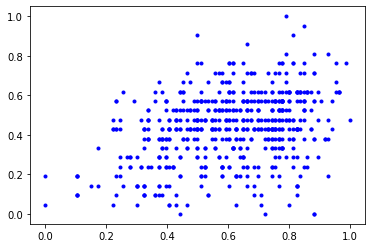

In [6]:
plt.plot(X[:, 0], X[:, 1], 'b.');

We will do the K-Means Clustering by hand here and then introduce the scikit learn package implementing it.

Let's see if we can identify two clusters in this data. We start by randomly assigning each point to one of the two groups.

In [7]:
y = np.array(rnd.randint(2, size=X.shape[0]))

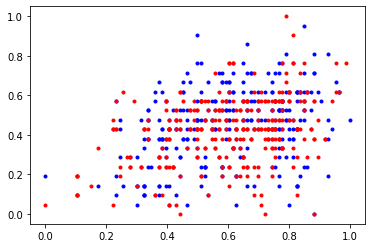

In [8]:
plt.plot(X[y==0, 0], X[y==0, 1], 'b.')
plt.plot(X[y==1, 0], X[y==1, 1], 'r.')

For each group we compute the centroid by finding the mean of the values along each axis.

In [9]:
def ret_centroids(X, y):
    
    return np.array([[X[y==0, 0].mean(), X[y==0, 1].mean()], [X[y==1, 0].mean(), X[y==1, 1].mean()]])

In [10]:
c = ret_centroids(X, y)
c

array([[0.60550289, 0.44510161],
       [0.60069184, 0.42362178]])

In [11]:
def plot_cluster(X, y, c):

    plt.figure(figsize=(10, 8))
    plt.plot(X[y==0, 0], X[y==0, 1], 'b.')
    plt.plot(X[y==1, 0], X[y==1, 1], 'r.')
    plt.plot(c[0, 0], c[0, 1], 'b*')
    plt.plot(c[1, 0], c[0, 1], 'r*')
    
    return None

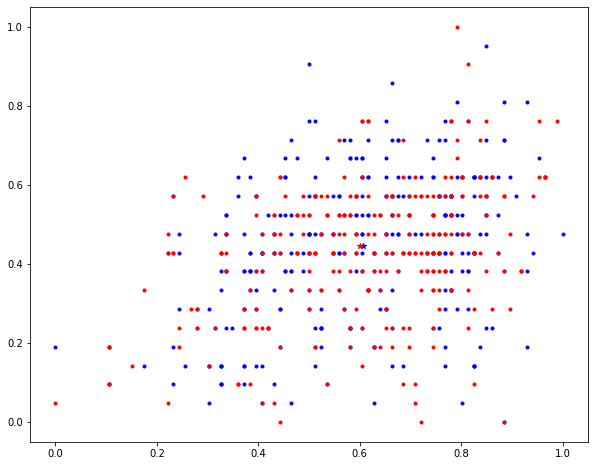

In [12]:
plot_cluster(X, y, c)

They are there (very close to each other).

Now we reassign the values of each point based on the centroid they are closest to.



In [13]:
def assign_cluster(X, y, c):
    
    for k in range(X.shape[0]):
        d0 = np.sqrt( (X[k, 0] - c[0, 0])**2 + (X[k, 1] - c[0, 1])**2)
        d1 = np.sqrt( (X[k, 0] - c[1, 0])**2 + (X[k, 1] - c[1, 1])**2)
        
        if d0 <= d1:
            y[k] = 0
        else:
            y[k] = 1
            
    return y

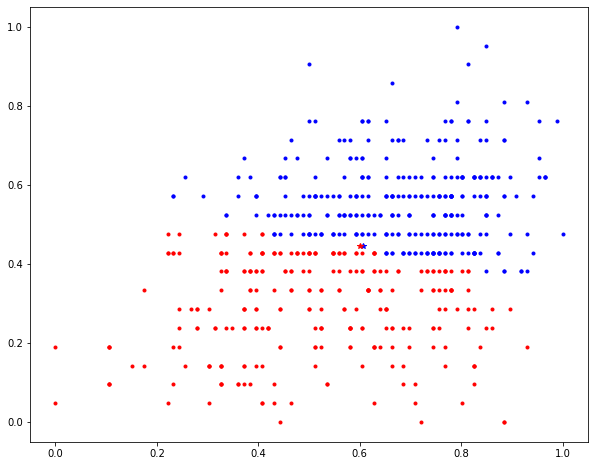

In [14]:
y = assign_cluster(X, y, c)
plot_cluster(X, y, c)

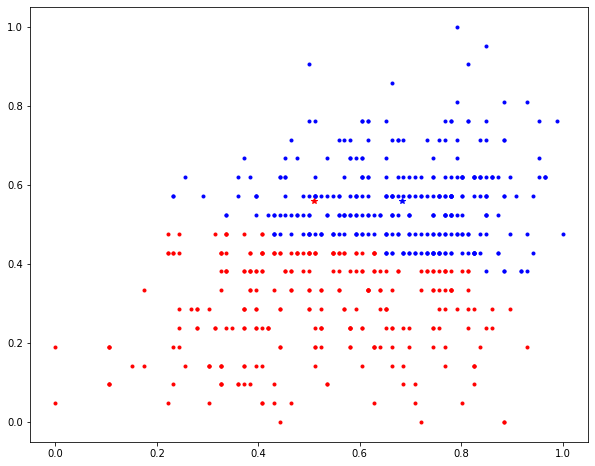

In [15]:
c = ret_centroids(X, y)
plot_cluster(X, y, c)

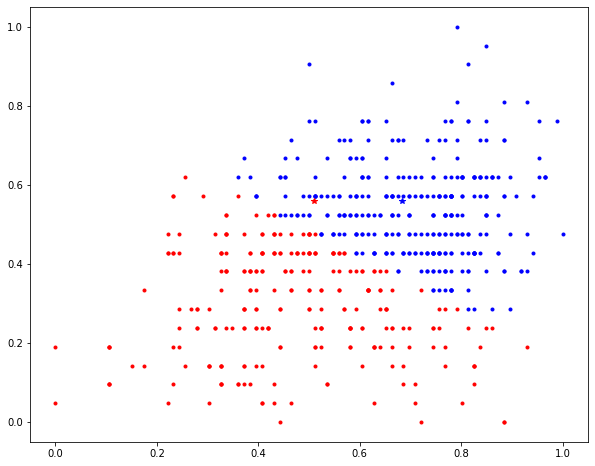

In [16]:
y = assign_cluster(X, y, c)
plot_cluster(X, y, c)

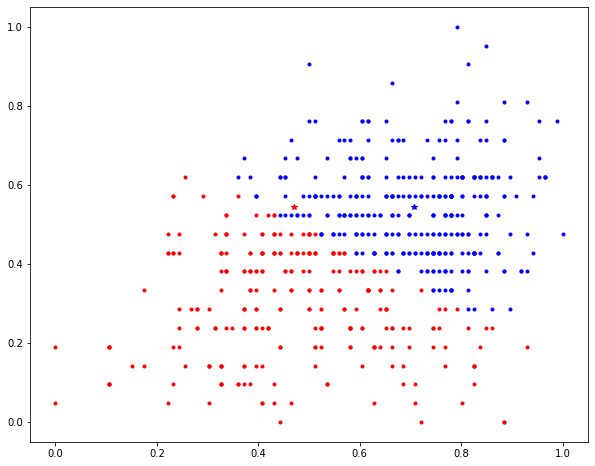

In [17]:
c = ret_centroids(X, y)
plot_cluster(X, y, c)

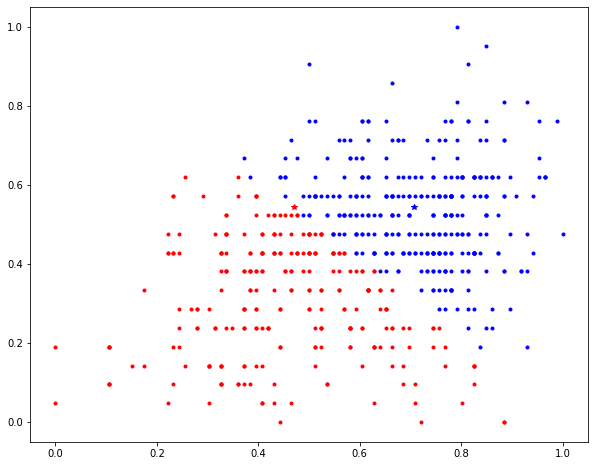

In [18]:
y = assign_cluster(X, y, c)
plot_cluster(X, y, c)

In practice K-means is minimizing the within-cluster sum-of-squares criterion that is the sum of the distances between the samples of a cluster and its centroid. This measurement does have some drawbacks, it will favor clusters that are convex, and it will miss clusters that are elongated or have irregular shapes.

The scikit learn algorithm, like our supervised algorithms comes with a score metric (computed from the ojective function) allowing us to train a division into clusters and then empiraclly test the value of it. The model once trained can be used to predict the division of the region into the clusters. Note however that evaluating the performance of a clustering model is not as straightforward as computing the percentage of correct classifications that we do in supervised learning. In this case we do not know what the true classification is for our sample.

The main parameter in the algorithm is $K$, the number of clusters. 

In [57]:
def cluster_plot(cluster, X):
    
    n = X.shape[0]
    test = int(0.20*n)            # We will use a test set made up of 20% of the data from our sample
    perm = rnd.permutation(n)   
    X = X[perm]
    X_test = X[:test]       # Then create the test
    X_train = X[test:]     # and train sets
    
    cluster.fit(X)
    
    nn = 200 # Mesh size  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nn),
        np.linspace(y_min, y_max, nn))
    Z = cluster.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    
    # We will need a larger list of colors for our plots today
    
    n_clusters = cluster.get_params()['n_clusters']
    cmap_light = pltco.ListedColormap([cm.cool(k/n_clusters) for k in range(n_clusters) ])
    cmap_bold = pltco.ListedColormap([cm.winter(k/n_clusters) for k in range(n_clusters) ])
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light);

    plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster.predict(X_train), cmap=cmap_bold,marker='o')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster.predict(X_test), cmap=cmap_bold, marker='+');
    
    print('Training Error: {}'.format(cluster.score(X_train)))
    print('Testing Error: {}'.format(cluster.score(X_test)))

In [58]:
from sklearn.cluster import KMeans

Training Error: -17.766963060512698
Testing Error: -4.533595921709729


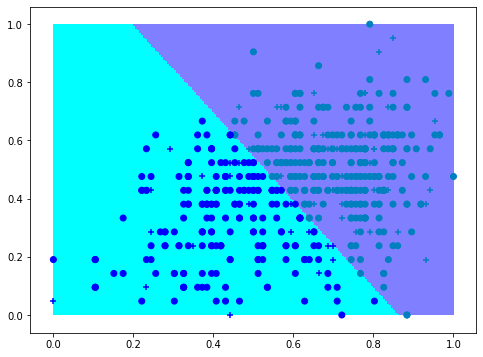

In [59]:
cluster = KMeans(n_clusters=2)
cluster_plot(cluster, X)

Training Error: -13.128550726657028
Testing Error: -3.2124484892016403


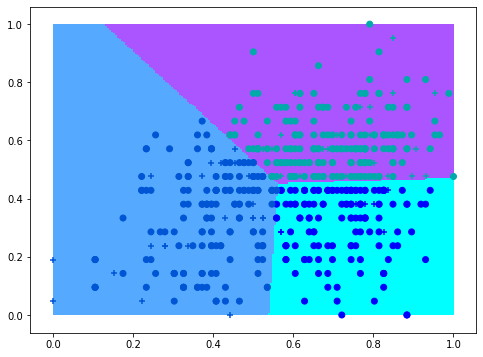

In [60]:
cluster = KMeans(n_clusters=3)
cluster_plot(cluster, X)

Training Error: -9.243082528840434
Testing Error: -2.4658552150406674


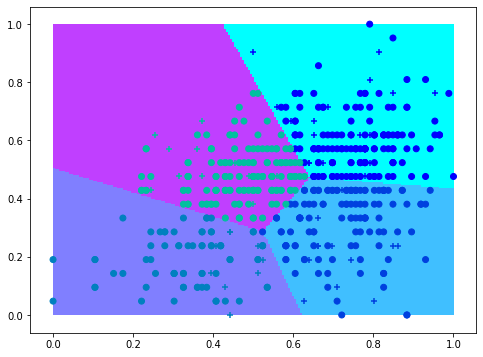

In [61]:
cluster = KMeans(n_clusters=4)
cluster_plot(cluster, X)

Training Error: -7.400472296763628
Testing Error: -2.234186675751234


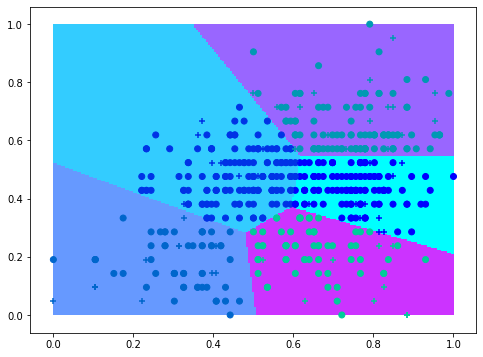

In [62]:
cluster = KMeans(n_clusters=5)
cluster_plot(cluster, X)

Training Error: -6.477686300821731
Testing Error: -1.5355063360068963


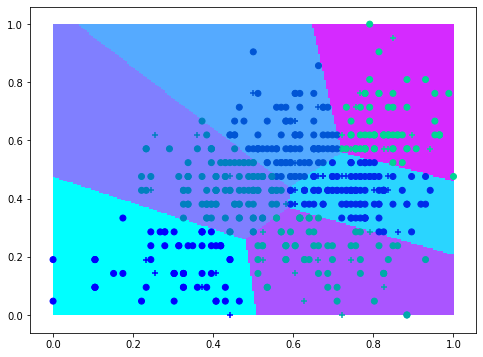

In [63]:
cluster = KMeans(n_clusters=6)
cluster_plot(cluster, X)

Training Error: -5.5293210445596035
Testing Error: -1.4445416012769943


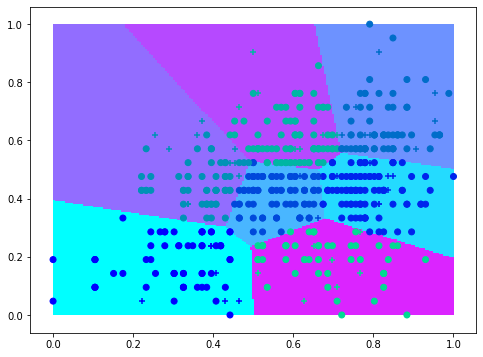

In [64]:
cluster = KMeans(n_clusters=7)
cluster_plot(cluster, X)

In [90]:
X = np.array(math131[['ACT_Math', 'ACT_Verbal']])
X.dtype

dtype('float64')

In [91]:
for l in range(X.shape[1]):
    X[:, l] = ( X[:, l] - X[:, l].min())/(X[:, l].max() - X[:, l].min())

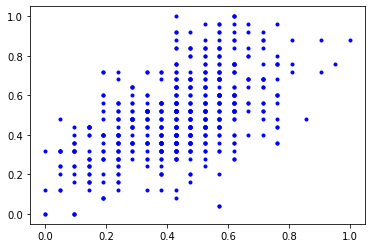

In [92]:
plt.plot(X[:, 0], X[:, 1], 'b.');

Training Error: -10.822186559235305
Testing Error: -3.395456947652107


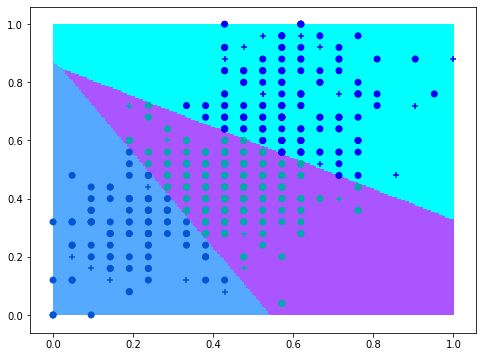

In [93]:
cluster = KMeans(n_clusters=3)
cluster_plot(cluster, X)